## Author : B Nikhil Sharma

### Objective- Predict the percentage of a student based on the no. of study hours using supervised ML 

#### Importing all the necessary tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

#We want our plots to be visible on our notebook
%matplotlib inline

#### Importing the dataset

In [2]:
scores=pd.read_csv("student_scores.csv")

In [3]:
# Printing the first 5 rows
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# description about the dataset
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
scores.shape

(25, 2)

In [7]:
# Calculate number of missing values
scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
#descriptive analysis
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Plotting Scores Vs Hours

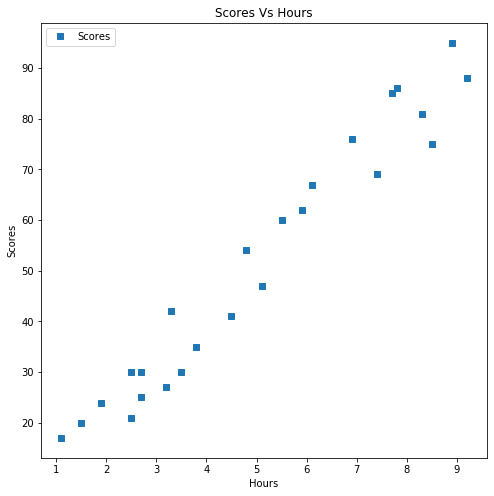

In [9]:
scores.plot(x="Hours",y="Scores",style="s",figsize=(8,8))
plt.title("Scores Vs Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

#### Correlation between features

In [20]:
scores.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Splitting the dataset into X and y

In [11]:
X= scores.iloc[:,:-1] #Hours
y=scores.iloc[:,1] #Scores

In [12]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [13]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

#### Splitting the dataset into train and test splits

In [15]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2)

In [16]:
len(X_train),len(y_train)

(20, 20)

#### Fitting the linear regression model

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicting the test values

In [18]:
y_preds= model.predict(X_test)

In [19]:
y_preds

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

#### Calculating the regression values

In [21]:
reg_line = model.coef_*X+model.intercept_


In [22]:
reg_line.head()

,Hours
0,27.032088
1,52.205491
2,33.809542
3,85.124557
4,36.714166


#### Plotting the regression line

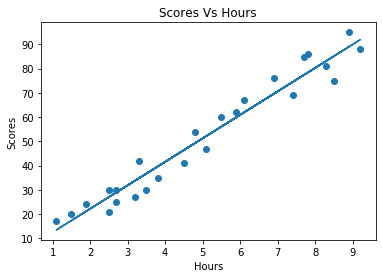

In [23]:
plt.scatter(X,y)
plt.plot(X,reg_line)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Scores Vs Hours")
plt.show()

#### Comparing the actual and predicted values

In [114]:
df = pd.DataFrame({"Actual_values":y_test,"Predicted_values":y_preds})

In [115]:
df

,Actual_values,Predicted_values
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


#### What will be the predicted score if a student studies for 9.25 hrs?

In [27]:
hrs = 9.25
pred_value = model.predict([[hrs]])
pred_value


array([92.38611528])

#### Evaluation of the model

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score                                                       

In [30]:
print("Mean Absolute Error is : {}".format(mean_absolute_error(y_test,y_preds)))
print("Mean Squared Error is : {}".format(mean_squared_error(y_test,y_preds)))
print("R Squared Error is : {}".format(r2_score(y_test,y_preds)))

Mean Absolute Error is : 3.9207511902099244
Mean Squared Error is : 18.943211722315272
R Squared Error is : 0.9678055545167994
